#### Impulse comparision between Hohmann and bieliptical transfer orbits.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
mu = 0.3986e6   # km^3 s^-2
rE = 6.378e3    # km

#### HOHMANN

In [3]:
# Inicial Orbit Radius:
ri = rE

# Radius relations: R = rf/ri
R = np.linspace(5, 100, 100)
rf = R*ri

# inicial and final velocities
Vi = np.sqrt(mu/ri)
Vf = np.sqrt(mu/rf)

# Hohmann transfer impulses
ah = (ri + rf)/2
Vtransa = np.sqrt(2*mu/ri - mu/ah)
Vtransb = np.sqrt(2*mu/rf - mu/ah)

DeltaVa = Vtransa - Vi
DeltaVb = Vf - Vtransb
DeltaVho = abs(DeltaVa) + abs(DeltaVb)

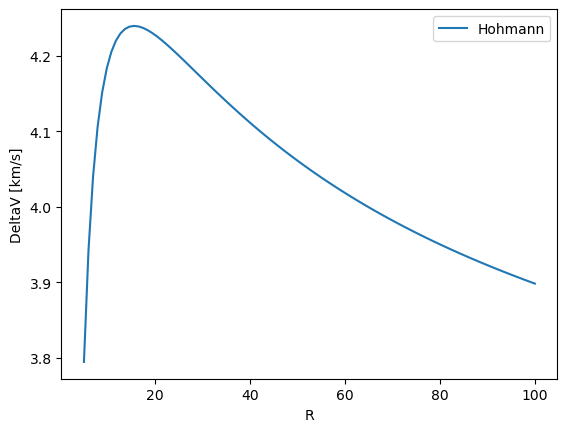

In [4]:
f = plt.figure()
plt.plot(R, DeltaVho, label='Hohmann')
plt.xlabel('R')
plt.ylabel('DeltaV [km/s]' )
plt.legend()
plt.show(f)

#### BIELIPTIC

In [5]:
# Radius relations: Rstar = rb/ri
Rstar = np.array([15, 30, 50, 80, 100, 200]).reshape(-1,1)
Rstar.shape

rf = R*ri
rb = Rstar*ri

# inicial and final velocities
Vi = np.sqrt(mu/ri)
Vf = np.sqrt(mu/(R*ri))

# Bieliptic transfer impulses
at1 = (ri + rb)/2
at2 = (rb + rf)/2

Vtrans1a = np.sqrt(2*mu/ri - mu/at1)
Vtrans1b = np.sqrt(2*mu/rb - mu/at1)
Vtrans2b = np.sqrt(2*mu/rb - mu/at2)
Vtrans2c = np.sqrt(2*mu/rf - mu/at2)

DeltaVa = Vtrans1a - Vi
DeltaVb = Vtrans2b - Vtrans1b
DeltaVc = - (Vf - Vtrans2c)
DeltaVbi = abs(DeltaVa) + abs(DeltaVb) + abs(DeltaVc)

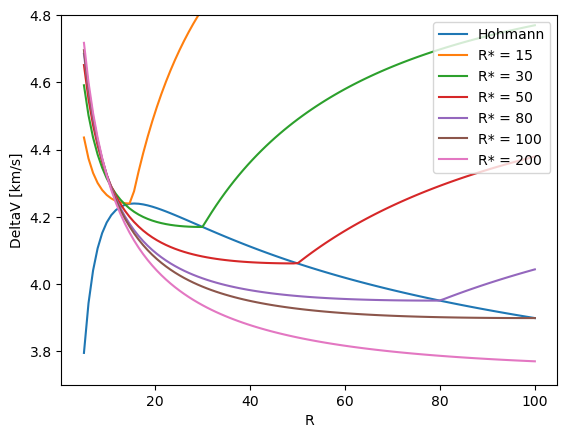

In [13]:
f = plt.figure()
plt.plot(R, DeltaVho, label='Hohmann')
for k in range(len(Rstar)):
    plt.plot(R, DeltaVbi[k], label= 'R* = ' + str(int(Rstar[k])))
plt.xlabel('R')
plt.ylabel('DeltaV [km/s]' )
plt.legend(loc=1)
plt.ylim([3.7, 4.8])
plt.show(f)